Enter the author name: Chetan Bhagat
Enter the genre: Fiction

Books recommended for 'Chetan Bhagat' and genre 'Fiction':
The Girl in Room 105
Revolution 2020
Five Point Someone


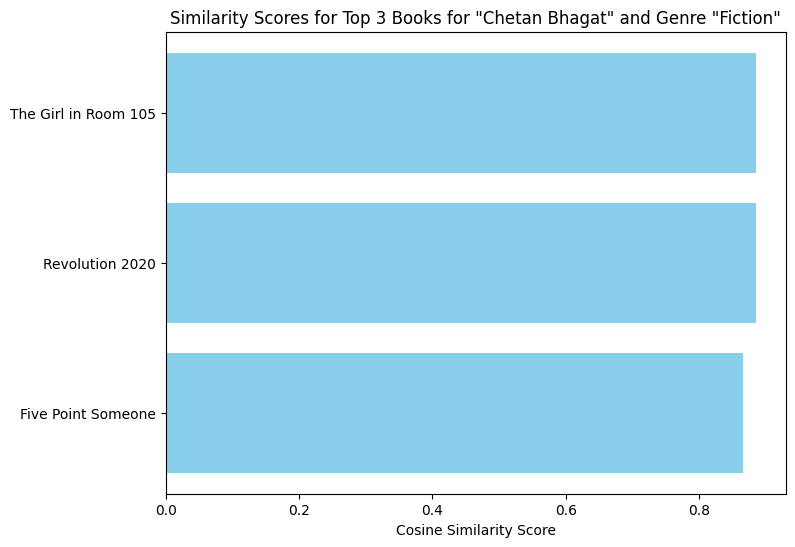

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Try reading the CSV with a different encoding
data = pd.read_csv('recommend.csv', encoding='ISO-8859-1')

# Convert to DataFrame
df = pd.DataFrame(data)

# Combine 'Author' and 'Genre' as a single feature, filling NaNs with empty strings
df['combined_features'] = df['Author'].fillna('') + ' ' + df['Genre'].fillna('')

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform the combined features into TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Calculate cosine similarity between the books
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend books based on a given author and genre input
def recommend_books(author, genre, cosine_sim=cosine_sim):
    # Create a combined feature string from the user input
    user_input = author + ' ' + genre

    # Transform the user input into a TF-IDF vector
    user_input_vector = tfidf.transform([user_input])

    # Calculate similarity scores between the user input and all books
    sim_scores = cosine_similarity(user_input_vector, tfidf_matrix)

    # Sort the books based on similarity scores (in descending order)
    sim_scores = list(enumerate(sim_scores[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices and similarity scores of the top 3 similar books
    top_sim_scores = sim_scores[:3]  # Top 3 similar books
    book_indices = [i[0] for i in top_sim_scores]
    top_scores = [i[1] for i in top_sim_scores]

    # Return the titles and scores of the top 3 similar books
    return df['Book Title'].iloc[book_indices], top_scores

# Input from the user
author_input = input("Enter the author name: ")
genre_input = input("Enter the genre: ")

# Get book recommendations and similarity scores
recommended_books, similarity_scores = recommend_books(author_input, genre_input)

# Output the recommended books
print(f"\nBooks recommended for '{author_input}' and genre '{genre_input}':")
for book in recommended_books:
    print(book)

# Plotting the similarity scores for the top 3 recommendations
plt.figure(figsize=(8, 6))
plt.barh(recommended_books, similarity_scores, color='skyblue')
plt.xlabel('Cosine Similarity Score')
plt.title(f'Similarity Scores for Top 3 Books for "{author_input}" and Genre "{genre_input}"')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()
